# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
import pandas as pd

dat = pd.read_csv("https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv")

dat.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We would need to dummify species, island and sex to run analysis with these variables included in our predictors. Possibly year too if we wanted to further go into time series but by the way its looking we don't need to do that now.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [3]:
dat = dat[dat['bill_depth_mm'].notna()] 
dat['x2'] = dat['bill_length_mm'] ** 2
dat['x3'] = dat['bill_length_mm'] ** 3
dat['x4'] = dat['bill_length_mm'] ** 4
dat['x5'] = dat['bill_length_mm'] ** 5
dat['x6'] = dat['bill_length_mm'] ** 6
dat['x7'] = dat['bill_length_mm'] ** 7
dat['x8'] = dat['bill_length_mm'] ** 8
dat['x9'] = dat['bill_length_mm'] ** 9
dat['x10'] = dat['bill_length_mm'] ** 10

<positron-console-cell-3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-3>:5: SettingWithCopyWarni

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
# Straight Line
y = dat['bill_depth_mm']
X = dat[['bill_length_mm']]

lr = LinearRegression()

lr_fit = lr.fit(X, y)

y_pred_lr = lr_fit.predict(dat[['bill_length_mm']])

dat['predicted_for_x'] = y_pred_lr

<positron-console-cell-5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
# Quadtratic 
y = dat['bill_depth_mm']
X2 = dat[['bill_length_mm', 'x2']]

lr_fit2 = lr.fit(X2, y)

y_pred_lr2 = lr_fit2.predict(dat[['bill_length_mm', 'x2']])

dat['predicted_for_x2'] = y_pred_lr2

<positron-console-cell-6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
# Cubic
y = dat['bill_depth_mm']
X3 = dat[['bill_length_mm', 'x2','x3']]

lr_fit3 = lr.fit(X3, y)

y_pred_lr3 = lr_fit3.predict(dat[['bill_length_mm', 'x2','x3']])

dat['predicted_for_x3'] = y_pred_lr3

<positron-console-cell-7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
# Big guy
y = dat['bill_depth_mm']
X10 = dat[['bill_length_mm', 'x2','x3','x4','x5','x6','x7','x8','x9','x10']]

lr_fit_big = lr.fit(X10, y)

y_pred_lr10 = lr_fit_big.predict(dat[['bill_length_mm', 'x2','x3','x4','x5','x6','x7','x8','x9','x10']])

dat['predicted_for_x10'] = y_pred_lr10

<positron-console-cell-8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


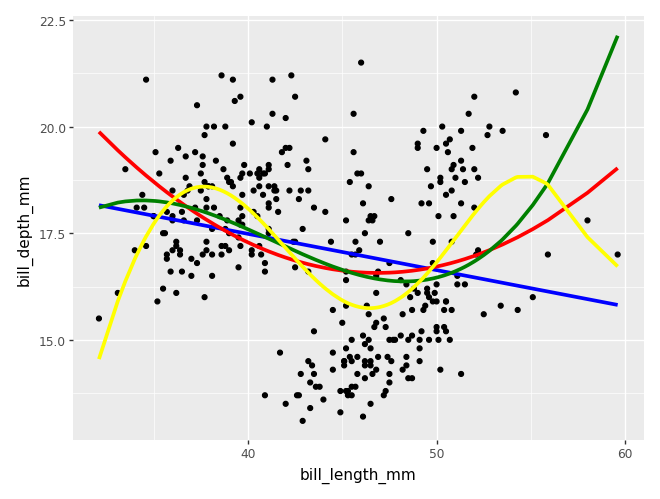

In [12]:
from plotnine import *

(ggplot(dat,
aes(x = 'bill_length_mm', y = 'bill_depth_mm'))
+ geom_point()
+ geom_line(aes(y = 'predicted_for_x'), size= 1.5, color = 'blue')
+ geom_line(aes(y = 'predicted_for_x2'), size= 1.5, color = 'red')
+ geom_line(aes(y = 'predicted_for_x3'), size= 1.5, color = 'green')
+ geom_line(aes(y = 'predicted_for_x10'), size= 1.5, color = 'yellow')
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The models above that are underfitting the data are the ones including x and x^2 (blue and red). We can see this because neither of them display patterns that the graph actually represents and doesn't adjust for the changes the data makes throughout the plot. 

I would say the model including x^10 is overfitting the data because it accounts for very small noise within our sample and makes adjustments based off of that noise, making it harder to generalize its predictions to another set of data.

I would say that the model including x^3 fits the model the best because it shows the most accurate trends in the model while not overfitting, making the results generalizable to other data.

In [ ]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_fitted = enc.fit(dat[['species']])
enc_fitted.transformed(dat[['species']]).todense()

# In class work: Scaler stuff/ standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# this fit step finds the mean and standard deviation needed to standardize 
scaler_fitted = scaler.fit(dat[['bill_length_mm']])
# this transform step then transforms the variable given its mean and standard deviation 
scaler_fitted.transform(dat[['bill_length_mm']])

array([[-0.88449874],
       [-0.81112573],
       [-0.66437972],
       [-1.32473679],
       [-0.84781224],
       [-0.92118525],
       [-0.86615549],
       [-1.80166135],
       [-0.35254443],
       [-1.12296102],
       [-1.12296102],
       [-0.5176337 ],
       [-0.976215  ],
       [-1.70994508],
       [-1.34308004],
       [-0.95787175],
       [-0.26082817],
       [-1.74663159],
       [ 0.38118565],
       [-1.12296102],
       [-1.14130427],
       [-1.47148281],
       [-1.04958801],
       [-0.9395285 ],
       [-1.58154232],
       [-0.60934996],
       [-0.62769321],
       [-1.10461777],
       [-0.62769321],
       [-0.81112573],
       [-1.23302053],
       [-0.81112573],
       [-0.5543202 ],
       [-1.37976655],
       [-0.86615549],
       [-0.9395285 ],
       [-0.31585793],
       [-1.15964752],
       [-0.75609598],
       [-1.3614233 ],
       [-0.57266346],
       [-1.45313956],
       [ 0.03266386],
       [-1.26970704],
       [-0.79278248],
       [-0